In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
import logisticRegression as lr
import data as data

#-------------------
# 1. データの作成
myData = data.classification(negLabel=0,posLabel=1, path="../../data")
myData.makeData(dataType=3)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
dtrNum = int(len(myData.X)*0.9)  # 学習データ数
# 学習データ（全体の90%）
Xtr = myData.X[:dtrNum]
Ytr = myData.Y[:dtrNum]

# 評価データ（全体の10%）
Xte = myData.X[dtrNum:]
Yte = myData.Y[dtrNum:]
#-------------------

#-------------------
# 3. 入力データの標準化
xMean = np.mean(Xtr,axis=0)
xStd = np.std(Xtr,axis=0)
Xtr = (Xtr-xMean)/xStd
Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 4. ロジスティックモデルの学習と評価
myModel = lr.logisticRegression(Xtr,Ytr)

trLoss = []
teLoss = []

for ite in range(1001):
    trLoss.append(myModel.CE(Xtr,Ytr))
    teLoss.append(myModel.CE(Xte,Yte))
    
    if ite%100==0:
        print(f"反復:{ite}")
        print(f"モデルパラメータ:\nw={myModel.w},\nb={myModel.b}")
        print(f"平均交差エントロピー損失={myModel.CE(Xte,Yte):.2f}")
        print(f"正解率={myModel.accuracy(Xte,Yte):.2f}")
        print("----------------")
        
    # モデルパラメータの更新
    myModel.update(alpha=1)
#-------------------




反復:0
モデルパラメータ:
w=[[-0.36875038]
 [ 1.06561739]],
b=[[0.07415267]]
平均交差エントロピー損失=1.01
正解率=0.25
----------------
反復:100
モデルパラメータ:
w=[[-3.03748428]
 [-3.23234203]],
b=[[0.17042797]]
平均交差エントロピー損失=0.01
正解率=1.00
----------------
反復:200
モデルパラメータ:
w=[[-3.49265561]
 [-3.90638134]],
b=[[0.23201548]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:300
モデルパラメータ:
w=[[-3.78579546]
 [-4.32167005]],
b=[[0.27316977]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:400
モデルパラメータ:
w=[[-4.00662484]
 [-4.62694818]],
b=[[0.30405034]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:500
モデルパラメータ:
w=[[-4.18550717]
 [-4.87023395]],
b=[[0.32872154]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:600
モデルパラメータ:
w=[[-4.33669602]
 [-5.07340514]],
b=[[0.34923188]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:700
モデルパラメータ:
w=[[-4.46810719]
 [-5.24835412]],
b=[[0.36676072]]
平均交差エントロピー損失=0.00
正解率=1.00
----------------
反復:800
モデルパラメータ:
w=[[-4.58462296]
 [-5.40229665]],
b=[[0.38204949]]
平均交差エントロピー損失=0.00
正解率=1.00
-----------

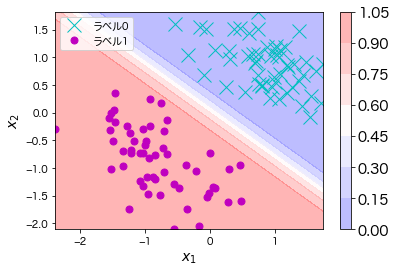

In [10]:
#-------------------
# 5. 真値と予測値のプロット
if Xtr.shape[1] == 1:
    myModel.plotModel1D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel)
elif Xtr.shape[1] == 2:
    myModel.plotModel2D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel)
#-------------------

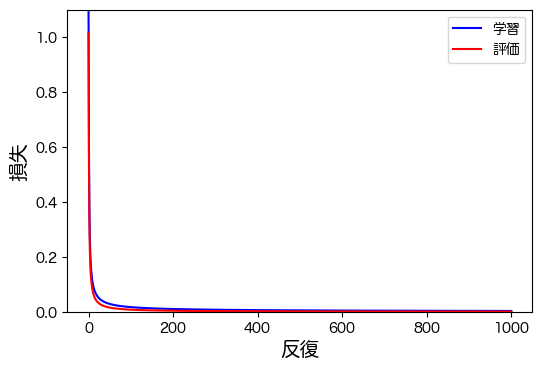

In [11]:

#-------------------
# 6. 学習と評価損失のプロット
myModel.plotEval(trLoss,teLoss)
#myModel.plotLoss(trLoss,teLoss)
#-------------------